#  Auto correlation vs Cross correlation

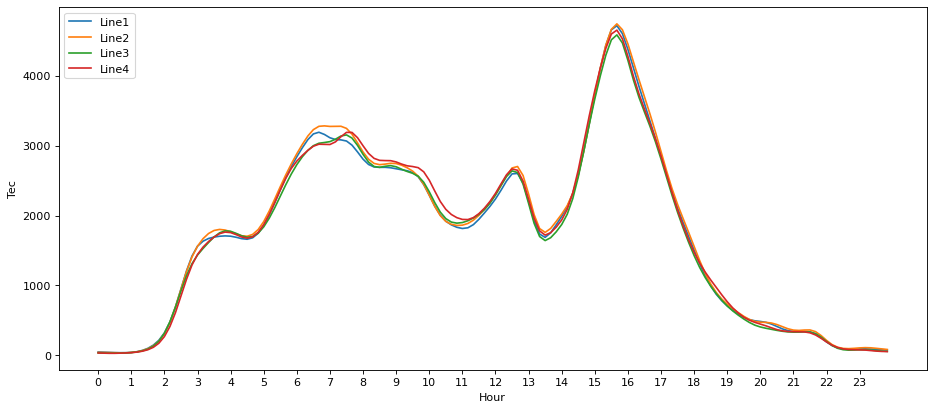

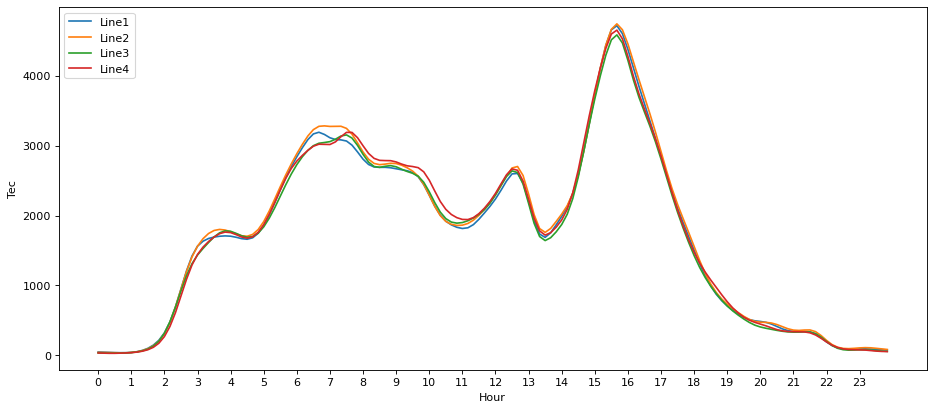

In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt

files = [f for f in os.listdir('.') if (os.path.isfile(f) and f.split('.')[1] == 'txt')]
my_path = os.getcwd()

try:
    os.mkdir('output')
except:
    pass

for f in files:
    plt.figure(figsize=(14, 6), dpi=80)
    try:
        data = np.loadtxt(f)[:,1:]
        plt_data = [[],[],[],[]]
        
        for i in range(0,1431,10):
            tmp = np.correlate(data[i:i+10,0:1].reshape(10,), data[i:i+10,1:2].reshape(10,))
            plt_data[0].append(tmp[0])
            
            tmp = np.correlate(data[i:i+10,1:2].reshape(10,), data[i:i+10,2:3].reshape(10,))
            plt_data[1].append(tmp[0])
            
            tmp = np.correlate(data[i:i+10,2:3].reshape(10,), data[i:i+10,3:4].reshape(10,))
            plt_data[2].append(tmp[0])
            
            tmp = np.correlate(data[i:i+10,3:4].reshape(10,), data[i:i+10,4:5].reshape(10,))
            plt_data[3].append(tmp[0])
        
    except:
        print('=========================================================')
        print(f)
        print('=========================================================')
    labels = ['Line1', 'Line2', 'Line3', 'Line4', 'Line5']
    for y_arr, label in zip(np.array(plt_data), labels):
        plt.plot(y_arr, label=label)

    plt.legend(loc="upper left")
    plt.xlabel('Hour')
    plt.xticks(np.arange(0,144,6), np.arange(0,24,1))
    plt.ylabel('Tec')
    plt.savefig(my_path + '/output/'+f.split('.')[0]+'-fig.png')